# Statistics on TEST SET

Files needed:
* target files (the train files are needed also for the cleaned datasets that need to be analysed):
    * precursors-train.txt: tokenized train set of the precursors
    * product-train.txt: tokenized train set of the product
    * class-multi-train.txt: tokenized file of the reaction class (ex 1.2.1 -> 1 1.2 1.2.1)
    * precursors-test.txt: tokenized test set of the precursors
    * product-test.txt: tokenized test set of the product
    * class-multi-test.txt: tokenized file of the reaction class (ex 1.2.1 -> 1 1.2 1.2.1)
    * precursors-valid.txt: tokenized valid set of the precursors
    * product-valid.txt: tokenized valid set of the product
    * class-multi-valid.txt: tokenized file of the reaction class (ex 1.2.1 -> 1 1.2 1.2.1)

Variables to set: **datapath**, **datapath2** (list)

Outputs:
* "figures/": the plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')

In [ ]:
# path where to save the plots
%mkdir figures
savepath="figures"

### Load the data in pandas dataframes

In [2]:
datapath = "path/to/test/files"

with open(datapath + "/precursors-test.txt") as f:
    precursors=[line.strip() for line in f.readlines()]
with open(datapath + "/precursors-train.txt") as f:
    precursors_train=[line.strip() for line in f.readlines()]
with open(datapath + "/precursors-valid.txt") as f:  
    precursors_valid=[line.strip() for line in f.readlines()]
    
with open(datapath + "/product-test.txt") as f:
    product=[line.strip() for line in f.readlines()]
with open(datapath + " product-train.txt") as f:
    product_train=[line.strip() for line in f.readlines()]
with open(datapath + "/product-valid.txt") as f:
    product_valid=[line.strip() for line in f.readlines()]

with open(datapath + "/class-multi-test.txt") as f:
    classes=[line.strip().split("\t") for line in f.readlines()]
    superclasses=[elem[0] for elem in classes]
with open(datapath + "/class-multi-train.txt") as f:
    classes_train=[line.strip().split("\t") for line in f.readlines()]
    superclasses_train=[elem[0] for elem in classes_train]
with open(datapath + "/class-multi-valid.txt") as f:
    classes_valid=[line.strip().split("\t") for line in f.readlines()]
    superclasses_valid=[elem[0] for elem in classes_valid]
    
# TRAIN dataframe
train_df = pd.DataFrame(precursors_train)
train_df.columns = ["precursors"]
train_df["product"] = product_train
train_df["classes"] = classes_train   
train_df["superclasses"] = superclasses_train

# TEST dataframe
test_df = pd.DataFrame(precursors)
test_df.columns = ["precursors"]
test_df["product"] = product
test_df["classes"] = classes   
test_df["superclasses"] = superclasses

# VALID dataframe
valid_df = pd.DataFrame(precursors_valid)
valid_df.columns = ["precursors"]
valid_df["product"] = product_valid
valid_df["classes"] = classes_valid
valid_df["superclasses"] = superclasses_valid

labels = ['0','1','2','3','4','5','6','7','8','9','10','11']

### Classes distribution in test, train and validation splits

In [3]:
test_df

,precursors,product,classes,superclasses
0,C C ( C ) ( C # N ) c 1 c c c ( C ( = O ) C 2 ...,C C ( C ) ( C ( = O ) O ) c 1 c c c ( C ( = O ...,"[9, 9.4, 9.4.1]",9
1,C = C ( C ) C ( = O ) O C C ( F ) ( F ) C ( F ) F,C = C ( C ) C ( = O ) O C C ( F ) ( F ) C ( F ...,"[10, 10.1, 10.1.3]",10
2,C C O . C c 1 c ( [N+] ( = O ) [O-] ) c c c ( ...,C c 1 c ( [N+] ( = O ) [O-] ) c c c ( N ) c 1 N,"[7, 7.1, 7.1.2]",7
3,C C O C ( C ) = O . C O . C c 1 c ( [N+] ( = O...,C c 1 c ( N ) c c c 2 c 1 n c n 2 C ( = O ) O ...,"[7, 7.1, 7.1.1]",7
4,C O . C c 1 c c ( [N+] ( = O ) [O-] ) c ( C ) ...,C c 1 c c ( N ) c ( C ) c 2 [nH] c n c 1 2,"[7, 7.1, 7.1.1]",7
...,...,...,...,...
131543,C C O . C c 1 c c c ( C ( = O ) O ) c 2 c c c ...,C C O C ( = O ) c 1 c c c ( C ) c 2 c c c c c 1 2,"[1, 1.7, 1.7.3]",1
131544,Br B ( Br ) Br . C C C ( = O ) N C ( C c 1 c c...,C C C ( = O ) N [C@H] 1 C c 2 c c c c ( C ( = ...,"[0, 0, 0.0]",0
131545,C N ( C ) C = O . C O c 1 c c ( B ( O ) O ) c ...,C O c 1 c c ( - c 2 c c ( O C ) c ( - n 3 c 4 ...,"[3, 3.1, 3.1.5]",3
131546,C 1 C O C C O 1 . C C 1 ( C ) c 2 c c c c ( P ...,C O c 1 n c ( Br ) c ( F ) c c 1 - n 1 c 2 c (...,"[0, 0, 0.0]",0


In [4]:
test_classes_percentages = []
length = len(test_df)
for cl in labels:
    df = test_df.loc[(test_df["superclasses"]==cl)]
    test_classes_percentages.append(len(df)/length*100)

In [5]:
test_classes_percentages

[33.87736795694347,
 16.498920546112444,
 12.603764405388146,
 6.555781919907562,
 2.6058929060114937,
 1.442059172317329,
 10.840149603186669,
 4.990573782953751,
 2.1094961534953023,
 6.147565907501444,
 2.241767263660413,
 0.08666038252196917]

In [6]:
train_classes_percentages = []
length = len(train_df)
for cl in labels:
    df = train_df.loc[(train_df["superclasses"]==cl)]
    train_classes_percentages.append(len(df)/length*100)

In [7]:
train_classes_percentages

[34.048746038018216,
 16.450736907594393,
 12.64845346090144,
 6.475160370933978,
 2.545673137553282,
 1.4229925258317009,
 10.832163305112532,
 5.0131155259241815,
 1.980696636203896,
 6.270650647789278,
 2.224006456874301,
 0.08760498726280655]

In [8]:
valid_classes_percentages = []
length = len(valid_df)
for cl in labels:
    df = valid_df.loc[(valid_df["superclasses"]==cl)]
    valid_classes_percentages.append(len(df)/length*100)
valid_classes_percentages

[34.113932178550655,
 16.478693428616754,
 12.626815836587927,
 6.476955966670947,
 2.5457594597248767,
 1.4254742137984695,
 10.925613966172373,
 4.9472340361241,
 1.900632285064626,
 6.246553404292286,
 2.2390596553782003,
 0.07327556901878725]

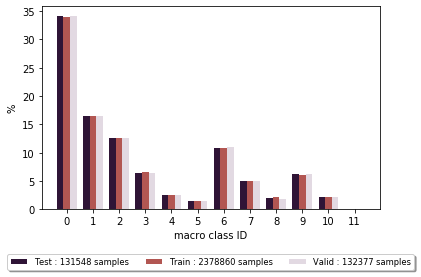

In [11]:
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
colors = [ cm.twilight(x) for x in np.linspace(0, 1.0, 5) ]

fig, ax = plt.subplots()

test_label =f"Test : {len(test_df)} samples"
train_label =f"Train : {len(train_df)} samples"
valid_label =f"Valid : {len(valid_df)} samples"

plt.bar(x - width, train_classes_percentages, width, label=test_label, color = colors[2])
plt.bar(x , test_classes_percentages, width, label=train_label,color = colors[3])
plt.bar(x + width, valid_classes_percentages, width, label=valid_label,color = colors[4])

ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xlabel("macro class ID")
plt.ylabel("%")
plt.legend(prop=fontP,loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=3)

fig.tight_layout()
plt.savefig(savepath + "/superclasses_distribution.pdf")

plt.show()

### Classes distribution for some of the cleaned datasets

In [12]:
datapath2 = ["path/to/test/files/baseline", \
            "path/to/test/files/cleaned/model1",\
            "path/to/test/files/cleaned/model2",\
            "path/to/test/files/cleaned/model3"]

classes_percentages = []

labels = ['0','1','2','3','4','5','6','7','8','9','10','11']

for datapath in path:
    with open(datapath + "class-multi-train.txt") as f:
        classes_train=[line.strip().split("\t") for line in f.readlines()]
        superclasses_train=[elem[0] for elem in classes_train]

    train_df = pd.DataFrame(superclasses_train)
    train_df.columns = ["superclasses"]   

    length = len(train_df)
    for cl in labels:
        df = train_df.loc[(train_df["superclasses"]==cl)]
        classes_percentages.append(len(df)/length*100)

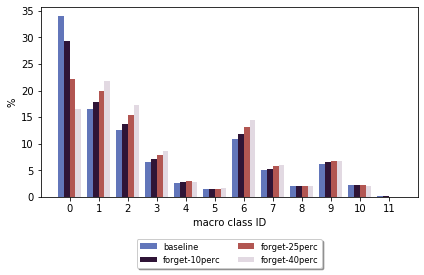

In [13]:
labels = ['0','1','2','3','4','5','6','7','8','9','10','11']
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars
colors = [ cm.twilight(x) for x in np.linspace(0, 1.0, 5) ]

fig, ax = plt.subplots()

exp = ["baseline","model1","model2","model3"]

plt.bar(x - 3 * width/2, classes_percentages[0:12], width, label=exp[0], color = colors[1])
plt.bar(x -width/2, classes_percentages[12:24], width, label=exp[1],color = colors[2])
plt.bar(x + width/2, classes_percentages[24:36], width, label=exp[2],color = colors[3])
plt.bar(x + 3*width/2, classes_percentages[36:48], width, label=exp[3],color = colors[4])

ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.xlabel("macro class ID")
plt.ylabel("%")
plt.legend(prop=fontP,loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=2)

fig.tight_layout()
plt.savefig(savepath + "/superclasses_distribution_forgetting.pdf")

plt.show()

### One-regent reactions in test and train set

In [17]:
test_df['single_prec'] = test_df['precursors'].map(lambda x : x.find('.'))
train_df['single_prec'] = train_df['precursors'].map(lambda x : x.find('.'))
print(len(test_df.loc[(test_df['single_prec']==-1)])/ len(test_df)*100, "%")
print(len(train_df.loc[(train_df['single_prec']==-1)])/ len(train_df)*100, "%")

8.520083923738863 %
8.506427448441691 %
